#### Importing Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [4]:
X = df.drop(columns = ['stab','stabf'])

In [5]:
y = df.stabf

In [6]:
y.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [9]:
scaler = StandardScaler()
scaler.fit(x_test)
x_test = scaler.transform(x_test)

In [10]:
x_test

array([[ 0.59216281, -0.42056489,  1.47247233, ...,  1.17528683,
        -1.49264423,  1.08629139],
       [ 0.19918339,  0.36454311, -0.19007599, ..., -0.39594869,
         1.41270302,  1.2275355 ],
       [-1.08603505, -0.32183365, -0.87350524, ..., -1.44437004,
         0.65421559, -1.67979856],
       ...,
       [ 0.94713772, -1.66831304, -1.62907667, ...,  0.12889933,
         0.57628587,  1.32084757],
       [-1.12735376,  0.18457336, -0.23820702, ...,  0.80017191,
        -1.3484627 , -0.79985771],
       [-1.38555998,  1.49904306,  0.27297057, ..., -0.92058109,
         0.00903865,  1.19055888]])

#####
#### Extra Tress Classifier

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)
ypred = clf.predict(x_test)

#####
#### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [27]:
from sklearn import metrics  

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.928


#####
#### XGBoost Classifier

In [14]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_train1 = encoder.fit_transform(y_train)
y_test1 = encoder.fit_transform(y_test)

In [28]:
model = XGBClassifier(random_state = 1)

In [29]:
model.fit(
    x_train,
    y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [30]:
y_pred = model.predict(x_test)

In [31]:
from sklearn import metrics  
print("ACCURACY OF THE MODEL: {0:.4f}".format(metrics.accuracy_score(y_test1, y_pred)))

ACCURACY OF THE MODEL: 0.9460


#####
#### LGBM Classifier

In [32]:
import lightgbm as ltb
model = ltb.LGBMClassifier(random_state = 1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [33]:
from sklearn import metrics  
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9365


#####
### Question 18
#### Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [40]:
parameters = {
    "n_estimators":[5,10,50,100,250],
    'min_samples_split': [5,10,20],
    'min_samples_leaf': [5,10,20],
    'max_features': [2,3,4]
    
}

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state = 1)

clf = RandomizedSearchCV(etc,param_distributions = parameters ,  cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)
search = clf.fit(x_train, y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 4}

#####
### Question 20
#### Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(x_train, y_train)
ypred = clf.predict(x_test)
feature_importance = clf.feature_importances_

In [46]:
feature_importance

array([0.11722206, 0.11806239, 0.11462785, 0.11537538, 0.03943054,
       0.04079263, 0.04030061, 0.03976884, 0.08919701, 0.09515359,
       0.09650756, 0.09356154])

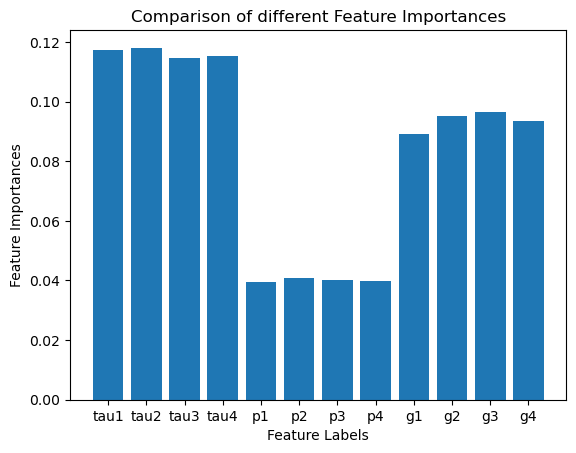

In [47]:
import matplotlib.pyplot as plt
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()